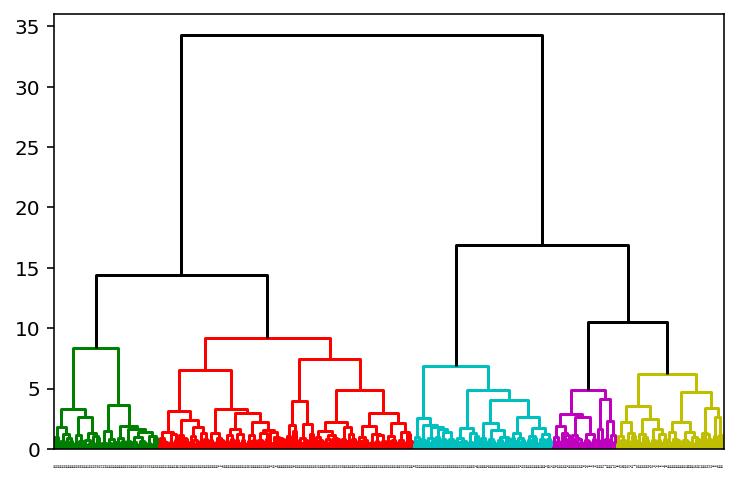

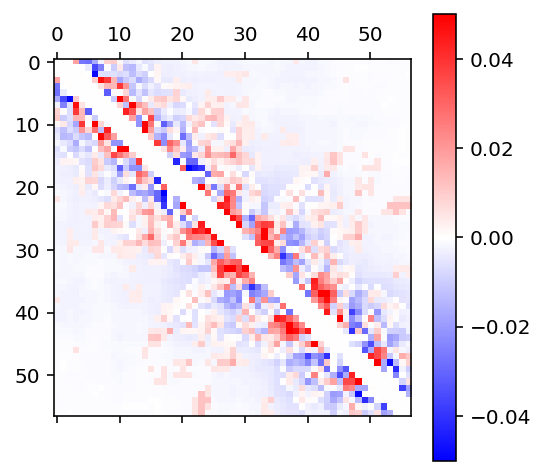

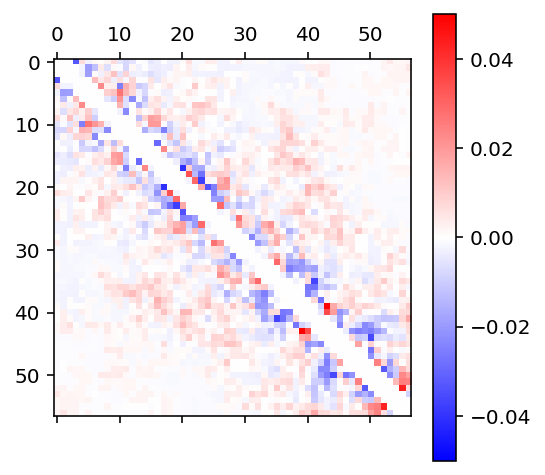

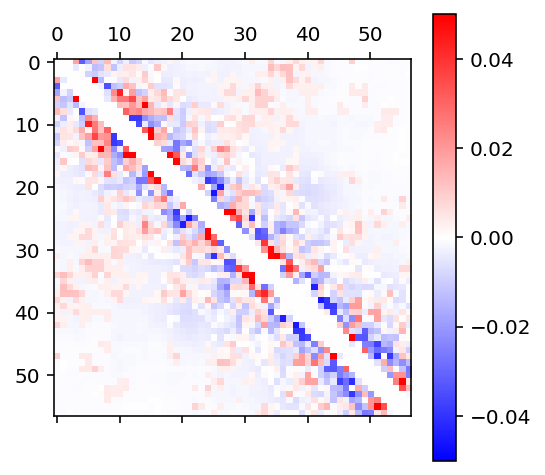

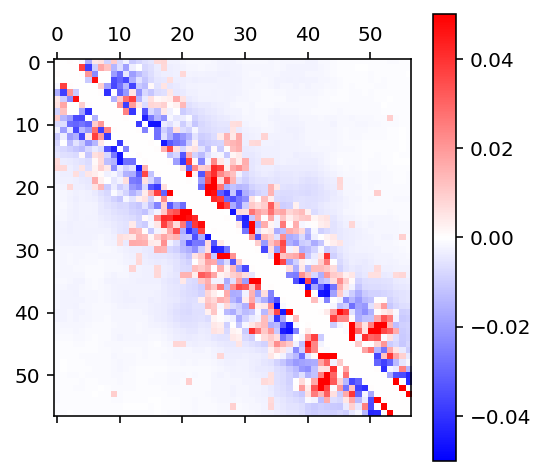

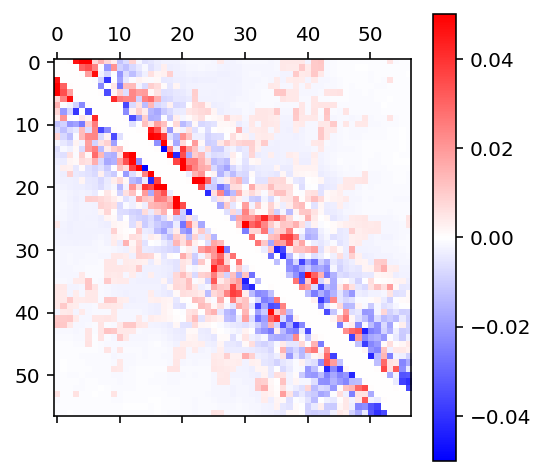

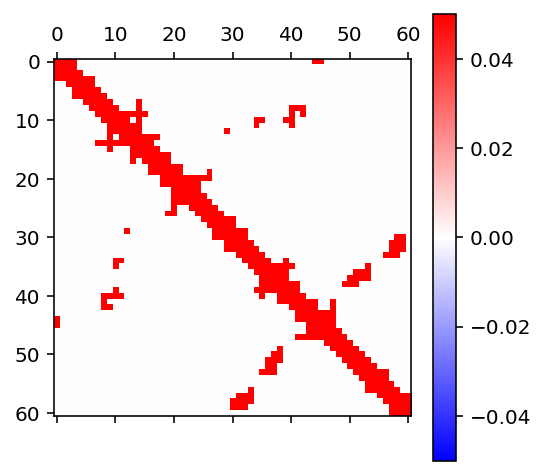

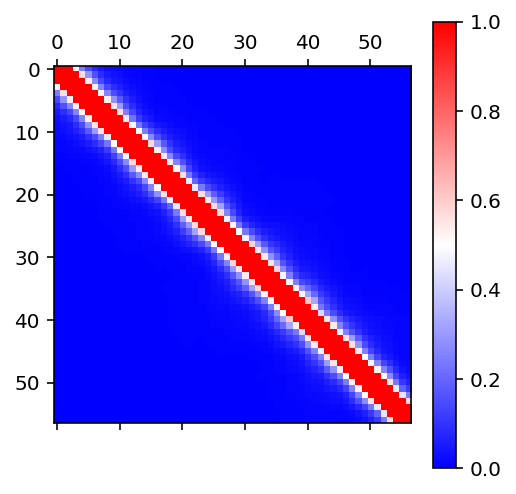

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pylab import figure, axes, pie, title
from pylab import arange, show, cm
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
from MDAnalysis.analysis import distances
from MDAnalysis.analysis.rms import rmsd
from MDAnalysis.analysis.rms import RMSD
from MDAnalysis.analysis.psa import PSAnalysis
from scipy import cluster, linalg
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from array import array
from collections import defaultdict
matplotlib.use('qt5agg')

u = mda.Universe('fus_g156e.psf','production_fus_g156e.dcd')
ref=mda.Universe('ca_single_5w3n.pdb')

cb=ref.select_atoms("name CA")
ca=u.select_atoms("(resname CA or resname GLY or resname ALA) and (bynum 65:174)")
cback = u.select_atoms("(resname CA or resname GLY or resname ALA)")
ctest = u.select_atoms("(resname CA)")
c_contact=u.select_atoms("(resname CA) and (bynum 77:190)")

#nframe = len(u.trajectory)
#print (nframe)
nframe = 1010
npairs = int(len(ctest)*(len(ctest)-1)/2)
print (npairs)
#mat = [[None for i in range(nframe)] for j in range(nframe)]
mat = np.zeros((nframe,npairs))
'''
f=open('dist_test.dat','a')

for ts in u.trajectory[0::200]:
    ts.frame = int(ts.frame/200)
    mat[ts.frame] = distances.self_distance_array(ctest.positions)

np.savetxt(f, mat)

f.close()

#print (mat[0][22790],mat[1][22790])
'''
'''
Create a 2d empty matrix.
The elements of the distance matrix is the difference in the average 
position of protein backbone
'''
'''
#distmatrix = np.zeros((nframe,nframe))
#distmatrix = [[float(i) for i in range(nframe)] for j in range(nframe)]
distmatrix = [[float(i) for i in range(nframe)] for j in range(nframe)]
#[[float(y) for y in x] for x in nums]
#for ts in u.trajectory:

f1=open('dist_mat.dat','w')
for i in range(nframe):
    for j in range(nframe):
        distmatrix[i][j] = 0
        for m in range(npairs):
            distmatrix[i][j] = distmatrix[i][j]+(mat[i][m]-mat[j][m])**2
        distmatrix[i][j] = np.sqrt(distmatrix[i][j])/(npairs)
    print (i)
np.savetxt(f1, distmatrix)
#for i in range(nframe):
#    for j in range(nframe):
#        distmatrix[i][j] = distmatrix[j][i]        
    
#linked = linkage(distmatrix, 'single')
'''
#X=np.array(distmatrix)
X=np.loadtxt('new_distmat_g156e_1000.dat')
#print (X)
Z = hierarchy.linkage(X,'ward')
dendrogram(Z, orientation='top', distance_sort='descending',color_threshold = 10.0, leaf_font_size= 1,above_threshold_color='black',get_leaves=True)

#plt.figure(figsize=(8,6))
#plt.savefig('dendrogram_calpha_fus.pdf')
plt.show()


import sys
np.set_printoptions(threshold=np.inf)

from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
max_d = 10.0
clusters = fcluster(Z,max_d,criterion='distance')
mapping = defaultdict(lambda : [])
for i, label in enumerate(clusters):
    mapping[label].append(i)

with open("Output_g156e_jan16_2020.txt", "w") as text_file:
    text_file.write(str(mapping))

import sys
sys.stdout = open('cluster_ID_new_jan16_2020.txt', 'wt')
np.set_printoptions(threshold=np.inf)
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit(Z)
y_hc.labels_

k1=0
k2=0
k3=0
k4=0
k5=0
k6=0
k=0

list4 = [0, 1, 2, 3, 4, 5, 24, 25, 26, 27, 28, 29, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 135, 136, 267, 271, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 290, 291, 292, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 575, 579, 580, 581, 582]
list5 = [6, 7, 8, 9, 10, 11, 12, 13, 22, 23, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 65, 66, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 137, 138, 263, 264, 265, 266, 268, 269, 270, 272, 288, 289, 293, 294, 295, 296, 297, 298, 299, 303, 316, 317, 318, 319, 320, 465, 466, 467, 468, 469, 470, 550, 551, 552, 571, 572, 573, 574, 576, 577, 578, 583, 584, 585, 586, 587, 588, 589, 590, 601, 602, 603, 604, 621, 622, 623, 624, 625, 626, 627, 628, 875, 876, 877, 878, 879, 880, 881, 882, 883, 892, 893, 896, 930, 935, 936, 937, 965, 966, 967, 974, 975, 976, 977, 978, 979, 983, 984]
list1 = [156, 157, 166, 167, 168, 169, 170, 171, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 781, 782, 783, 784, 785, 786, 787, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809]
list3 = [14, 15, 16, 17, 18, 19, 20, 21, 67, 68, 84, 85, 86, 94, 104, 105, 106, 107, 108, 128, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 249, 255, 256, 257, 258, 259, 260, 261, 262, 300, 301, 302, 321, 322, 323, 336, 337, 338, 417, 418, 419, 422, 428, 440, 449, 450, 451, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 471, 472, 473, 474, 482, 483, 484, 485, 487, 488, 489, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 531, 532, 541, 542, 543, 544, 545, 546, 547, 548, 549, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 630, 631, 632, 633, 634, 684, 866, 867, 868, 869, 870, 871, 872, 873, 874, 884, 885, 886, 887, 888, 889, 890, 891, 894, 895, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 914, 915, 916, 922, 923, 924, 925, 926, 927, 928, 929, 931, 932, 933, 934, 938, 939, 940, 959, 960, 961, 962, 963, 964, 968, 969, 970, 971, 972, 973, 980, 981, 982, 985, 986, 987, 988, 989, 990, 991]
list2 = [69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 87, 88, 149, 150, 151, 152, 153, 154, 155, 158, 159, 160, 161, 162, 163, 164, 165, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 246, 247, 248, 250, 251, 252, 253, 254, 339, 340, 341, 342, 343, 344, 345, 346, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 420, 421, 423, 424, 425, 426, 427, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 441, 442, 443, 444, 445, 446, 447, 448, 452, 453, 475, 476, 477, 478, 479, 480, 481, 486, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 523, 524, 525, 526, 527, 528, 529, 530, 533, 534, 535, 536, 537, 538, 539, 540, 629, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 788, 789, 790, 791, 792, 793, 794, 795, 796, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 911, 912, 913, 917, 918, 919, 920, 921, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 992, 993, 994, 995, 996, 997, 998, 999]

list1= [i * 200 for i in list1]
list2= [i * 200 for i in list2]
list3= [i * 200 for i in list3]
list4= [i * 200 for i in list4]
list5= [i * 200 for i in list5]
#print (list5)

for ts in u.trajectory[list1]:
    k1 +=distances.contact_matrix(c_contact.positions, cutoff=8.5, returntype='numpy', box=None)
#k1=k1/len(u.trajectory[list1])
k1=k1/len(list1)

for ts in u.trajectory[list2]:
    k2 +=distances.contact_matrix(c_contact.positions, cutoff=8.5, returntype='numpy', box=None)
#k2=k2/len(u.trajectory[list2])
k2=k2/len(list2)
for ts in u.trajectory[list3]:
    k3 +=distances.contact_matrix(c_contact.positions, cutoff=8.5, returntype='numpy', box=None)
#k3=k3/len(u.trajectory[list3])
k3=k3/len(list3)

for ts in u.trajectory[list4]:
    k4 +=distances.contact_matrix(c_contact.positions, cutoff=8.5, returntype='numpy', box=None)
#k4=k4/len(u.trajectory[list4])
k4=k4/len(list4)

for ts in u.trajectory[list5]:
    k5 +=distances.contact_matrix(c_contact.positions, cutoff=8.5, returntype='numpy', box=None)
#k5=k5/len(u.trajectory[list5])
k5=k5/len(list5)
#for ts in u.trajectory[list6]:
#    k6 +=distances.contact_matrix(ctest.positions, cutoff=8.0, returntype='numpy', box=None)
    
for ts in u.trajectory:
    k +=distances.contact_matrix(c_contact.positions, cutoff=8.5, returntype='numpy', box=None)
k=k/len(u.trajectory)

ref_matrix= distances.contact_matrix(cb.positions, cutoff=8.5, returntype='numpy', box=None)
#k=(k1+k2+k3+k4+k5)/5

dk1=np.subtract(k1, k)
dk2=np.subtract(k2, k)
dk3=np.subtract(k3, k)
dk4=np.subtract(k4, k)
dk5=np.subtract(k5, k)



'''
for ts in u.trajectory[list4]:     # iterate through all frames
    r = cterm.position - nterm.position # end-to-end vector from atom positions
    d = numpy.linalg.norm(r)  # end-to-end distance
    rgyr = ctest.radius_of_gyration()  # method of AtomGroup
    print("frame = {0}: d = {1} A, Rgyr = {2} A".format(
          ts.frame, d, rgyr))
'''

cmap = cm.bwr
cmap.set_under('w')

plt.matshow(dk1, cmap=cmap,vmin=0, vmax=0.05)
plt.colorbar()
plt.matshow(dk2, cmap=cmap,vmin=0, vmax=0.05)
plt.colorbar()
plt.matshow(dk3, cmap=cmap,vmin=0, vmax=0.05)
plt.colorbar()
plt.matshow(dk4, cmap=cmap,vmin=0, vmax=0.05)
plt.colorbar()
plt.matshow(dk5, cmap=cmap,vmin=0, vmax=0.05)
plt.colorbar()
plt.matshow(ref_matrix, cmap=cmap,vmin=0, vmax=0.05)
plt.colorbar()
plt.matshow(k, cmap=cmap,vmin=0, vmax=1)
#plt.imshow(dk1, cmap=cmap, vmin=0, vmax=0.01)
plt.colorbar()
plt.show()
'''
Rgyr1 = []
Rgyr2 = []
Rgyr3 = []
Rgyr4 = []
Rgyr5 = []


for ts in u.trajectory[list1]:
    Rgyr1.append(ctest.radius_of_gyration())
for ts in u.trajectory[list2]:
    Rgyr2.append(ctest.radius_of_gyration())
for ts in u.trajectory[list3]:
    Rgyr3.append(ctest.radius_of_gyration())
for ts in u.trajectory[list4]:
    Rgyr4.append(ctest.radius_of_gyration())
for ts in u.trajectory[list5]:
    Rgyr5.append(ctest.radius_of_gyration())
    
fig1 = plt.figure(1)
plt.plot(Rgyr1)
fig2 = plt.figure(2)
plt.plot(Rgyr2)
fig3 = plt.figure(3)
plt.plot(Rgyr3)
fig4 = plt.figure(4)
plt.plot(Rgyr4)
fig5 = plt.figure(5)
plt.plot(Rgyr5)

Rgyr = []
for ts in u.trajectory[0::200]:
    Rgyr.append(c_contact.radius_of_gyration())
Rgyr=np.array(Rgyr)
print(Rgyr)
'''
#plt.figure(figsize=(5, 5))
#plt.scatter(Z[:,0],Z[:,1], c=y_hc.labels_, cmap='prism')  # plot points with cluster dependent colors
#plt.show()

plt.show()
